In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift

In [17]:
# Load the full grocery customer dataset and take a random sample of 100 instances
data = pd.read_csv('customer_personality.csv').sample(500, random_state=123)

In [18]:
# Use StandardScaler() to standardize input features
X = data[['Fruits', 'Meats']]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

In [19]:
# Apply mean-shift clustering
mean_shift = MeanShift(bandwidth=2)
mean_shift = mean_shift.fit(X)

#Increase the number of points sampled to 500. Re-run the code and examine changes in the output.
#Set the bandwidth to 1. Re-run the code and examine changes in the output.
#Set the bandwidth to 2. Re-run the code and examine changes in the output.

In [20]:
# Print the cluster labels and core point indices
print('Cluster centers:', mean_shift.cluster_centers_)
print('Cluster labels:', mean_shift.labels_)
print('Number of clusters:', len(mean_shift.cluster_centers_))

Cluster centers: [[-0.48326566 -0.52150147]
 [ 2.43469221  0.66910442]
 [ 2.73114356  1.86616269]
 [-0.66711376  6.14034203]]
Cluster labels: [0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 2 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0
 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 3 0 0 2 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 2 0 0 0 3 1 2 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 2 0 1 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 2 0 0 1 0 0 1 0 0 1 0 0 2 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 2 0 0 0 0 2 1 0 0 0 2 0 1 2 0 0 0 0 0 2
 1 1 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 2
 2 1 0 0 0 0 0 1 0 0 0 0 0 0 0 2 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 

In [21]:
# Add the cluster labels to the dataset as strings
data['clusters'] = mean_shift.labels_.astype(str)

# Sort by cluster label (for plotting purposes)
data.sort_values(by='clusters', inplace=True)

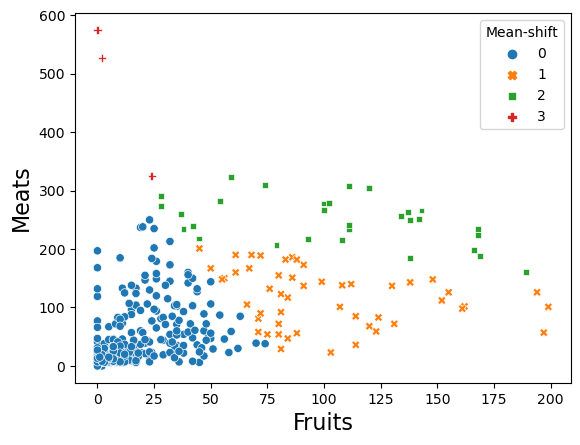

In [22]:
# Plot clusters on the original data
p = sns.scatterplot(data=data, x='Fruits',
                    y='Meats', hue='clusters',
                    style='clusters')
p.set_xlabel('Fruits', fontsize=16)
p.set_ylabel('Meats', fontsize=16)
p.legend(title='Mean-shift')